<a href="https://colab.research.google.com/github/tanphat2008/AI/blob/main/fullanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [5]:
trainset='/content/drive/MyDrive/baitapai/archive11/flowers/'

In [6]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 10523 images belonging to 12 classes.
Found 1162 images belonging to 12 classes.


In [7]:
validation_set.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'dandelion': 8,
 'iris': 9,
 'rose': 10,
 'sunflower': 11}

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)
     

Epoch 1/50
83/83 [==============================] - 2019s 24s/step - loss: 2.2603 - accuracy: 0.1982 - val_loss: 1.8255 - val_accuracy: 0.2806
Epoch 2/50
83/83 [==============================] - 70s 845ms/step - loss: 1.5224 - accuracy: 0.4286 - val_loss: 1.3719 - val_accuracy: 0.5215
Epoch 3/50
83/83 [==============================] - 70s 847ms/step - loss: 1.2763 - accuracy: 0.5145 - val_loss: 1.1487 - val_accuracy: 0.5697
Epoch 4/50
83/83 [==============================] - 70s 848ms/step - loss: 1.1749 - accuracy: 0.5554 - val_loss: 1.0715 - val_accuracy: 0.6059
Epoch 5/50
83/83 [==============================] - 72s 865ms/step - loss: 1.0823 - accuracy: 0.5898 - val_loss: 1.1031 - val_accuracy: 0.6093
Epoch 6/50
83/83 [==============================] - 74s 888ms/step - loss: 0.9775 - accuracy: 0.6340 - val_loss: 0.9447 - val_accuracy: 0.6652
Epoch 7/50
83/83 [==============================] - 75s 899ms/step - loss: 0.9216 - accuracy: 0.6591 - val_loss: 1.0665 - val_accuracy: 0.6179

In [12]:
model.save('/content/content/drive/MyDrive/fullanh.h5')

In [14]:
model1=load_model('/content/content/drive/MyDrive/fullanh.h5')

In [21]:
label = ['astilbe','bellflower','black_eyed_susan','calendula','california_poppy','carnation','common_daisy','coreopsis','dandelion','iris','rose','sunflower']

1/1 [==============================] - 0s 33ms/step
sunflower


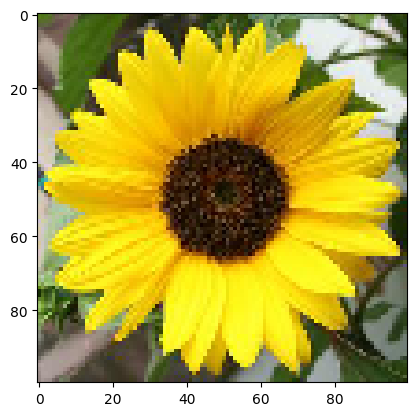

In [22]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/archive11/flowers/sunflower/29326709_e086a90c33_c.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 25ms/step
rose


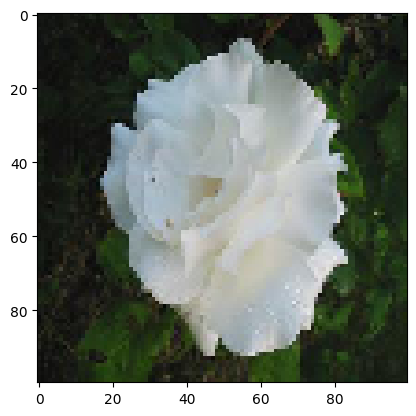

In [23]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/archive11/flowers/rose/27128674_b07bd9bb38_c.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 21ms/step
bellflower


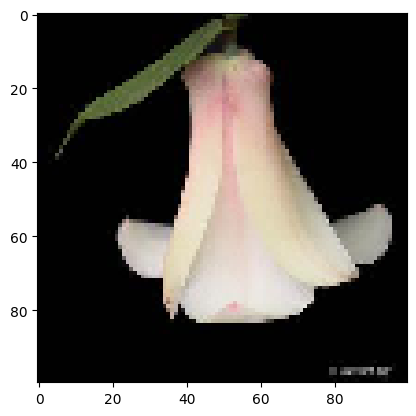

In [29]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/archive11/flowers/bellflower/91412597_2f41a129f0_c.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])